In [169]:
import sys
sys.path.append("..")
import foodcosts.core as core
import requests
import json
import calendar
import pandas as pd
from fastbook import *
from datetime import date
from fastai.tabular.core import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [2]:
def get_hours_worked_for_a_shop_for_a_period(warehouse_id, start_yyyy_mm_dd, end_yyyy_mm_dd):
    url = "https://formation.fthek.be/api/v2/hours_worked/period"
    body = {
        "warehouse_id": warehouse_id,
        "start_yyyy_mm_dd": start_yyyy_mm_dd,
        "end_yyyy_mm_dd": end_yyyy_mm_dd
    }
    response = requests.get(url, json=body)
    print(response.status_code)
    if response.status_code == 200:
        return response.json()
    else:
        print(response)
        return None

In [3]:
# get hours worked for march 2023 for Chatelain
res = get_hours_worked_for_a_shop_for_a_period(
    warehouse_id=12,
    start_yyyy_mm_dd="2023-03-01",
    end_yyyy_mm_dd="2023-03-02"
)
print(res)

200
[{'hoursWorked': 11.06666666666667, 'employee': 'Bram DE KEYSER', 'date': '2023-03-02T23:00:00.000Z', 'warehouseId': 12}, {'hoursWorked': 11.18333333333333, 'employee': 'Marine JANSSENS', 'date': '2023-03-01T23:00:00.000Z', 'warehouseId': 12}, {'hoursWorked': 10.95, 'employee': 'Fernando HERNANDEZ GUARDADO', 'date': '2023-03-02T23:00:00.000Z', 'warehouseId': 12}, {'hoursWorked': 11.18333333333333, 'employee': 'Paul GUERRERO', 'date': '2023-03-01T23:00:00.000Z', 'warehouseId': 12}, {'hoursWorked': 11.03333333333333, 'employee': 'Paul GUERRERO', 'date': '2023-03-02T23:00:00.000Z', 'warehouseId': 12}]


In [4]:
shops = [( core.get_shop_id(shop_name), shop_name ) for shop_name in core.get_shop_names()]

config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that


In [5]:
shops

[(2, 'La Hulpe'),
 (3, 'Fort Jaco'),
 (4, 'Woluwe'),
 (6, 'Tongres'),
 (7, 'Wemmel'),
 (12, 'CHATELAIN'),
 (36, 'OVERIJSE'),
 (39, 'LATEM')]

In [6]:
# imports
from datetime import date
import calendar

# returns list of date strings in yyyy_mm_dd format
def get_dates_in_month(month, year):
    return [date(year, month, day).strftime("%Y-%m-%d") for day in range(1, calendar.monthrange(year, month)[1] + 1)]

get_dates_in_month(3,2023)

['2023-03-01',
 '2023-03-02',
 '2023-03-03',
 '2023-03-04',
 '2023-03-05',
 '2023-03-06',
 '2023-03-07',
 '2023-03-08',
 '2023-03-09',
 '2023-03-10',
 '2023-03-11',
 '2023-03-12',
 '2023-03-13',
 '2023-03-14',
 '2023-03-15',
 '2023-03-16',
 '2023-03-17',
 '2023-03-18',
 '2023-03-19',
 '2023-03-20',
 '2023-03-21',
 '2023-03-22',
 '2023-03-23',
 '2023-03-24',
 '2023-03-25',
 '2023-03-26',
 '2023-03-27',
 '2023-03-28',
 '2023-03-29',
 '2023-03-30',
 '2023-03-31']

In [7]:
core.get_shop_names()

config.ini file available... using that


['La Hulpe',
 'Fort Jaco',
 'Woluwe',
 'Tongres',
 'Wemmel',
 'CHATELAIN',
 'OVERIJSE',
 'LATEM']

In [8]:
# interested_shops = [(4, 'Woluwe'),  (12, 'CHATELAIN')]
interested_shops = [
    (
    core.get_shop_id(name),
    name 
    ) for name in core.get_shop_names()
]

config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that


In [9]:
core.get_sales_for_period_for_shop_per_day("2023-01-01", "2023-03-31", "Woluwe").head(4)

config.ini file available... using that


,shop_name,day,total_sales
0,Woluwe,2023-01-02,2943.39616
1,Woluwe,2023-01-03,2850.73890
2,Woluwe,2023-01-04,3917.95500
3,Woluwe,2023-01-05,3937.68200


In [10]:
def get_data_table(dates, shops):
    min_date = min(dates)
    max_date = max(dates)
    # data frame shop_sales
    shop_sales = pd.DataFrame() 
    shop_hours = pd.DataFrame()
    for id, name in shops:
        sales = core.get_sales_for_period_for_shop_per_day(min_date, max_date, name)
        sales["warehouseId"] = id
        shop_sales = shop_sales.append(sales, ignore_index=True) 

        hours = get_hours_worked_for_a_shop_for_a_period(id, min_date, max_date)
        shop_hours = shop_hours.append(hours, ignore_index=True)
    return shop_hours, shop_sales

In [11]:
# using get_dates_in_month, return a list of all dates in the first quarter of 2023
all_dates = [
    date for month in range(1,4) for date in get_dates_in_month(month, 2023)
]
all_dates

['2023-01-01',
 '2023-01-02',
 '2023-01-03',
 '2023-01-04',
 '2023-01-05',
 '2023-01-06',
 '2023-01-07',
 '2023-01-08',
 '2023-01-09',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-13',
 '2023-01-14',
 '2023-01-15',
 '2023-01-16',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-20',
 '2023-01-21',
 '2023-01-22',
 '2023-01-23',
 '2023-01-24',
 '2023-01-25',
 '2023-01-26',
 '2023-01-27',
 '2023-01-28',
 '2023-01-29',
 '2023-01-30',
 '2023-01-31',
 '2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-04',
 '2023-02-05',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-09',
 '2023-02-10',
 '2023-02-11',
 '2023-02-12',
 '2023-02-13',
 '2023-02-14',
 '2023-02-15',
 '2023-02-16',
 '2023-02-17',
 '2023-02-18',
 '2023-02-19',
 '2023-02-20',
 '2023-02-21',
 '2023-02-22',
 '2023-02-23',
 '2023-02-24',
 '2023-02-25',
 '2023-02-26',
 '2023-02-27',
 '2023-02-28',
 '2023-03-01',
 '2023-03-02',
 '2023-03-03',
 '2023-03-04',
 '2023-03-05',
 '2023-03-06',
 '2023-03-07',
 '2023-03-

In [12]:
hours_df, sales_df = get_data_table(all_dates, interested_shops)

config.ini file available... using that
200
config.ini file available... using that
200
config.ini file available... using that
200
config.ini file available... using that
400
<Response [400]>
config.ini file available... using that
200
config.ini file available... using that
200
config.ini file available... using that
200
config.ini file available... using that
200


In [13]:
# convert day to string %Y-%m-%d
# sales_df["day"] = sales_df["day"].apply(lambda x: x.strftime("%Y-%m-%d"))
sales_df.head().iloc[0].day

datetime.date(2023, 1, 2)

In [14]:
hours_df

,hoursWorked,employee,date,warehouseId
0,10.466667,Maxime VANHAMME,2023-01-01T22:59:59.999Z,2
1,10.383333,Kevin BETTE,2023-01-01T22:59:59.999Z,2
2,5.750000,Massimo OLIVO,2023-01-01T22:59:59.999Z,2
3,7.016667,Annabelle GATHY,2023-01-01T22:59:59.999Z,2
4,7.016667,Léa VAN DEN HOUTE,2023-01-01T22:59:59.999Z,2
...,...,...,...,...
1804,7.083333,Lies VERSTRAETEN,2023-01-06T23:00:00.000Z,39
1805,4.566667,Lies VERSTRAETEN,2023-01-07T23:00:00.000Z,39
1806,5.166667,Lies VERSTRAETEN,2023-01-13T23:00:00.000Z,39
1807,5.116667,Lies VERSTRAETEN,2023-01-20T23:00:00.000Z,39


In [15]:
hours_df.employee.unique()

array(['Maxime VANHAMME', 'Kevin BETTE', 'Massimo OLIVO',
       'Annabelle GATHY', 'Léa VAN DEN HOUTE', 'Inès DACY',
       'Khalil BOUMESHED', 'Savina RAJANAH', 'Vincenzo LO GATTO',
       'Maximilien MICHIELS', 'Shahine BANDALI', 'Aurelie MARIVOET',
       'Tito RODRIGUEZ AMAYA', 'Benjamin MOENECLAEY',
       'Carlos AZUCINA RECINA', 'Armel KANDJEU', 'Luca BORGO',
       'Grace EBELLE', 'Renaud LECOMTE', 'Ana DE OLIVEIRA CARREIRA',
       'Diana ARBELAEZ CORREA', 'Nadine DEBROUX', 'Anne LIPPENS',
       'Myriam VANDERHAEGEN', 'Armando APARICIO PEREZ', 'Ronny BERT',
       'Thomas MOT', 'Esther ZHU', 'Charlotte SNEYERS', 'Guy MAWETE',
       'Kris GALOPPIN', 'Aubin KANDJEU', 'Nicolas QUERTINMONT',
       'Sanne DE LOOSE', 'Jelle ERAERTS', 'Makane',
       'Christian BOURGUIGNON', 'Justine CORNET', 'Pauline POSOCCO',
       'Jawhara TAMRI', 'Bram DE KEYSER', 'Marine JANSSENS',
       'Fernando HERNANDEZ GUARDADO', 'Paul GUERRERO', 'Fatou YARA',
       'Ricardo GUERRERO', 'Johan VAN GU

In [16]:
hours_df.head()

,hoursWorked,employee,date,warehouseId
0,10.466667,Maxime VANHAMME,2023-01-01T22:59:59.999Z,2
1,10.383333,Kevin BETTE,2023-01-01T22:59:59.999Z,2
2,5.750000,Massimo OLIVO,2023-01-01T22:59:59.999Z,2
3,7.016667,Annabelle GATHY,2023-01-01T22:59:59.999Z,2
4,7.016667,Léa VAN DEN HOUTE,2023-01-01T22:59:59.999Z,2


In [17]:
pivoted_hours_df = hours_df.pivot_table(
    columns="employee",
    index=["warehouseId", "date"],
    values="hoursWorked",
    fill_value=0
)
pivoted_hours_df.reset_index(inplace=True)

In [18]:
# add column called date_label
# pivoted_hours_df["date_label"] = pivoted_hours_df["date"].apply(lambda x: x.strftime("%Y-%m-%d"))
pivoted_hours_df["day"] = pd.to_datetime(pivoted_hours_df.date).apply(lambda x: x.strftime("%Y-%m-%d"))

In [19]:
sales_df.head()

,shop_name,day,total_sales,warehouseId
0,La Hulpe,2023-01-02,1732.00586,2
1,La Hulpe,2023-01-03,1715.98970,2
2,La Hulpe,2023-01-04,2034.67742,2
3,La Hulpe,2023-01-05,1319.44470,2
4,La Hulpe,2023-01-06,1337.52960,2


In [20]:
sales_df.head().iloc[0].day

datetime.date(2023, 1, 2)

In [21]:
pivoted_hours_df.head()
# sales_df.head()[["warehouseId", "day"]].iloc[0].day

employee,warehouseId,date,Alessandra CHIANALE,Alix VERSTRAETEN,Ana DE OLIVEIRA CARREIRA,Anna SCHEPENS,Annabelle GATHY,Anne LIPPENS,Anne-Laure VERWEE,Armando APARICIO PEREZ,...,Sanne DE LOOSE,Savina RAJANAH,Shahine BANDALI,Stefanie VERMEERSCH,Sylvie DE MEYER,Thomas MOT,Tito RODRIGUEZ AMAYA,Vincenzo LO GATTO,Wout VERSTRAEYEN,day
0,2,2023-01-01T22:59:59.999Z,0.0,0.0,0.0,0.0,7.016667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-01-01
1,2,2023-01-01T23:00:00.000Z,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-01-01
2,2,2023-01-02T23:00:00.000Z,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-01-02
3,2,2023-01-03T23:00:00.000Z,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-01-03
4,2,2023-01-04T23:00:00.000Z,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2023-01-04


In [22]:

sales_df["date"] = sales_df.day
sales_df["day"] = pd.to_datetime(sales_df.day).apply(lambda x: x.strftime("%Y-%m-%d"))
# sales_df.iloc[0]
#result = pd.merge(pivoted_hours_df, sales_df, on=['warehouseId', 'day'])

In [23]:
merged_res = pd.merge(
    sales_df, 
    pivoted_hours_df, 
    on=[
        'warehouseId', 
         'day'
    ]
    )

In [24]:
merged_res.head()

,shop_name,day,total_sales,warehouseId,date_x,date_y,Alessandra CHIANALE,Alix VERSTRAETEN,Ana DE OLIVEIRA CARREIRA,Anna SCHEPENS,...,Roos VANDEKERCKHOVE,Sanne DE LOOSE,Savina RAJANAH,Shahine BANDALI,Stefanie VERMEERSCH,Sylvie DE MEYER,Thomas MOT,Tito RODRIGUEZ AMAYA,Vincenzo LO GATTO,Wout VERSTRAEYEN
0,La Hulpe,2023-01-02,1732.00586,2,2023-01-02,2023-01-02T23:00:00.000Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,La Hulpe,2023-01-03,1715.98970,2,2023-01-03,2023-01-03T23:00:00.000Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,La Hulpe,2023-01-04,2034.67742,2,2023-01-04,2023-01-04T23:00:00.000Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,La Hulpe,2023-01-05,1319.44470,2,2023-01-05,2023-01-05T23:00:00.000Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,La Hulpe,2023-01-06,1337.52960,2,2023-01-06,2023-01-06T23:00:00.000Z,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Add more features

In [40]:
# import add_datepart from fastai
# drop column date
def add_features(df):
    # add column day of the week (i.e. mon, tue, wed, etc.)
    add_datepart(df,  "day")
    # df["day_of_week"] = pd.to_datetime(df.day).apply(lambda x: x.strftime("%A"))

In [45]:
def test():
    df = sales_df.copy()
    add_features(df)
    print(df)
test()

  shop_name         day  total_sales  warehouseId        date
0  La Hulpe  2023-01-02   1732.00586            2  2023-01-02
1  La Hulpe  2023-01-03   1715.98970            2  2023-01-03
    shop_name  total_sales  warehouseId        date  dayYear  dayMonth  \
0    La Hulpe   1732.00586            2  2023-01-02     2023         1   
1    La Hulpe   1715.98970            2  2023-01-03     2023         1   
2    La Hulpe   2034.67742            2  2023-01-04     2023         1   
3    La Hulpe   1319.44470            2  2023-01-05     2023         1   
4    La Hulpe   1337.52960            2  2023-01-06     2023         1   
..        ...          ...          ...         ...      ...       ...   
699     LATEM   2584.94780           39  2023-03-26     2023         3   
700     LATEM   1516.20070           39  2023-03-27     2023         3   
701     LATEM   1623.17946           39  2023-03-28     2023         3   
702     LATEM   2472.40770           39  2023-03-29     2023         3   


In [47]:
add_features(merged_res)

KeyError: 'day'

In [49]:
merged_res.head()

,shop_name,total_sales,warehouseId,date_x,date_y,Alessandra CHIANALE,Alix VERSTRAETEN,Ana DE OLIVEIRA CARREIRA,Anna SCHEPENS,Annabelle GATHY,...,dayDay,dayDayofweek,dayDayofyear,dayIs_month_end,dayIs_month_start,dayIs_quarter_end,dayIs_quarter_start,dayIs_year_end,dayIs_year_start,dayElapsed
0,La Hulpe,1732.00586,2,2023-01-02,2023-01-02T23:00:00.000Z,0.0,0.0,0.0,0.0,0.0,...,2,0,2,False,False,False,False,False,False,1.672618e+09
1,La Hulpe,1715.98970,2,2023-01-03,2023-01-03T23:00:00.000Z,0.0,0.0,0.0,0.0,0.0,...,3,1,3,False,False,False,False,False,False,1.672704e+09
2,La Hulpe,2034.67742,2,2023-01-04,2023-01-04T23:00:00.000Z,0.0,0.0,0.0,0.0,0.0,...,4,2,4,False,False,False,False,False,False,1.672790e+09
3,La Hulpe,1319.44470,2,2023-01-05,2023-01-05T23:00:00.000Z,0.0,0.0,0.0,0.0,0.0,...,5,3,5,False,False,False,False,False,False,1.672877e+09
4,La Hulpe,1337.52960,2,2023-01-06,2023-01-06T23:00:00.000Z,0.0,0.0,0.0,0.0,0.0,...,6,4,6,False,False,False,False,False,False,1.672963e+09


In [309]:
# remove warehouseId from merged_res
merged_res.drop(columns=["warehouseId","day", "date_x", "date_y"], inplace=True)

In [310]:
merged_res.head()

,shop_name,total_sales,Alessandra CHIANALE,Alix VERSTRAETEN,Ana DE OLIVEIRA CARREIRA,Anna SCHEPENS,Annabelle GATHY,Anne LIPPENS,Anne-Laure VERWEE,Armando APARICIO PEREZ,...,Sanne DE LOOSE,Savina RAJANAH,Shahine BANDALI,Stefanie VERMEERSCH,Sylvie DE MEYER,Thomas MOT,Tito RODRIGUEZ AMAYA,Vincenzo LO GATTO,Wout VERSTRAEYEN,day_of_week
0,La Hulpe,1732.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,Monday
1,La Hulpe,1715.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,Tuesday
2,La Hulpe,2034.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,Wednesday
3,La Hulpe,1319.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,Thursday
4,La Hulpe,1337.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,Friday


# training

In [311]:
cat_names = ["day_of_week", "shop_name"]

In [312]:
# get names of columns that are not in cat_names or not equal to total_sales
cont_names = [col for col in merged_res.columns if col not in cat_names and col != "total_sales"]
cont_names

['Alessandra CHIANALE',
 'Alix VERSTRAETEN',
 'Ana DE OLIVEIRA CARREIRA',
 'Anna SCHEPENS',
 'Annabelle GATHY',
 'Anne LIPPENS',
 'Anne-Laure VERWEE',
 'Armando APARICIO PEREZ',
 'Armel KANDJEU',
 'Aubin KANDJEU',
 'Aurelie MARIVOET',
 'Benjamin MOENECLAEY',
 'Bram DE KEYSER',
 'Britt JOORIS',
 'Carine VERCRAYE',
 'Carlos AZUCINA RECINA',
 'Cato DE SLOOVERE',
 'Charlotte DE LANGE',
 'Charlotte SNEYERS',
 'Christian BOURGUIGNON',
 'Cécile BOLSAIE',
 'Diana ARBELAEZ CORREA',
 'Ella DE GRAEVE',
 'Esther ZHU',
 'Fatou YARA',
 'Fernando HERNANDEZ GUARDADO',
 'Giorgio LAMAGNO',
 'Grace EBELLE',
 'Guy MAWETE',
 'Hubert VAN STRIEN',
 'Inès DACY',
 'Jawhara TAMRI',
 'Jaya DE SCHEPPER',
 'Jelle ERAERTS',
 'Johan VAN GUCHT',
 'Jules DE WITTE',
 'Justine CORNET',
 'Kathy REGELBRUGGE',
 'Kevin BETTE',
 'Khalil BOUMESHED',
 'Kris GALOPPIN',
 'Lies VERSTRAETEN',
 'Linde',
 'Lisa DE BRUYKER CHABBA',
 'Luca BORGO',
 'Léa VAN DEN HOUTE',
 'Makane',
 'Marine JANSSENS',
 'Massimo OLIVO',
 'Mathis DENIS',


In [313]:
df = pd.get_dummies(merged_res, columns=cat_names)

In [314]:
df.head()

,total_sales,Alessandra CHIANALE,Alix VERSTRAETEN,Ana DE OLIVEIRA CARREIRA,Anna SCHEPENS,Annabelle GATHY,Anne LIPPENS,Anne-Laure VERWEE,Armando APARICIO PEREZ,Armel KANDJEU,...,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,shop_name_CHATELAIN,shop_name_Fort Jaco,shop_name_LATEM,shop_name_La Hulpe,shop_name_OVERIJSE,shop_name_Wemmel,shop_name_Woluwe
0,1732.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,1,0,0,0
1,1715.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,0,0,1,0,0,0
2,2034.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,1,0,0,0,1,0,0,0
3,1319.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,1,0,0,0
4,1337.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,1,0,0,0


In [315]:
from torch import tensor

t_dep = tensor(df.total_sales.values, dtype=float)

In [316]:
indep_cols = [col for col in df.columns if col not in cat_names and col != "total_sales"]

In [317]:
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [318]:
t_indep.shape

torch.Size([599, 86])

In [319]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132, -0.1487, -0.2551,
         0.3328,  0.1292,  0.2361, -0.2622,  0.4051, -0.2674, -0.2312,  0.1147,
         0.4072,  0.2834,  0.0835, -0.0504,  0.4354, -0.3408, -0.4552,  0.1447,
        -0.4648, -0.3039, -0.1297, -0.0850,  0.4682,  0.3973, -0.4849,  0.2098,
        -0.3018,  0.4185,  0.1089,  0.0791, -0.1708, -0.1882,  0.4861, -0.2534,
        -0.2502, -0.0770,  0.3336, -0.4975, -0.2561,  0.0892, -0.4670,  0.3725,
        -0.1095,  0.3443, -0.3448,  0.1112, -0.2866,  0.0245, -0.1640, -0.0845,
        -0.1318,  0.3686,  0.3743,  0.4772, -0.0329, -0.3076,  0.1449,  0.3728,
         0.1066, -0.1043, -0.4297, -0.0069, -0.2685,  0.2132])

In [320]:
t_indep*coeffs

tensor([[-0., 0., 0.,  ..., -0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        ...,
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., 0.]])

In [321]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [322]:
t_indep*coeffs

tensor([[-0., 0., 0.,  ..., -0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        ...,
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., 0.],
        [-0., 0., 0.,  ..., -0., -0., 0.]])

In [323]:
preds = (t_indep*coeffs).sum(axis=1)

In [324]:
preds[:10]

tensor([-0.5767, -1.2906, -0.5112, -0.5628, -0.6637, -0.6638, -0.4289, -0.5990,
        -1.3077, -0.7758])

In [325]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(2931.7363, dtype=torch.float64)

In [326]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [327]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132, -0.1487, -0.2551,
         0.3328,  0.1292,  0.2361, -0.2622,  0.4051, -0.2674, -0.2312,  0.1147,
         0.4072,  0.2834,  0.0835, -0.0504,  0.4354, -0.3408, -0.4552,  0.1447,
        -0.4648, -0.3039, -0.1297, -0.0850,  0.4682,  0.3973, -0.4849,  0.2098,
        -0.3018,  0.4185,  0.1089,  0.0791, -0.1708, -0.1882,  0.4861, -0.2534,
        -0.2502, -0.0770,  0.3336, -0.4975, -0.2561,  0.0892, -0.4670,  0.3725,
        -0.1095,  0.3443, -0.3448,  0.1112, -0.2866,  0.0245, -0.1640, -0.0845,
        -0.1318,  0.3686,  0.3743,  0.4772, -0.0329, -0.3076,  0.1449,  0.3728,
         0.1066, -0.1043, -0.4297, -0.0069, -0.2685,  0.2132],
       requires_grad=True)

In [328]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [329]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(480, 119)

In [330]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [331]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [332]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [333]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [334]:
coeffs = train_model(18, lr=0.2)

2926.872; 2926.791; 2926.710; 2926.628; 2926.547; 2926.466; 2926.384; 2926.303; 2926.222; 2926.140; 2926.059; 2925.977; 2925.896; 2925.815; 2925.733; 2925.652; 2925.571; 2925.489; 

In [337]:
def show_coeffs(): 
    res = dict(zip(indep_cols, coeffs.requires_grad_(False)))
    # sort by value from highest to lowest
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    for k,v in res.items(): print(f"{k}: {v:.3f}")
show_coeffs()

day_of_week_Sunday: 1.017
shop_name_CHATELAIN: 0.935
day_of_week_Monday: 0.879
day_of_week_Saturday: 0.832
Nadine DEBROUX: 0.755
day_of_week_Wednesday: 0.670
shop_name_Woluwe: 0.656
Sanne DE LOOSE: 0.637
Luca BORGO: 0.632
shop_name_Fort Jaco: 0.594
Justine CORNET: 0.540
day_of_week_Thursday: 0.537
Diana ARBELAEZ CORREA: 0.535
shop_name_OVERIJSE: 0.533
Marine JANSSENS: 0.512
Benjamin MOENECLAEY: 0.510
Armando APARICIO PEREZ: 0.509
Anne-Laure VERWEE: 0.506
Mathis DENIS: 0.460
Léa VAN DEN HOUTE: 0.458
Guy MAWETE: 0.458
Jelle ERAERTS: 0.457
Jaya DE SCHEPPER: 0.432
Bram DE KEYSER: 0.431
shop_name_LATEM: 0.406
Fatou YARA: 0.393
Fernando HERNANDEZ GUARDADO: 0.392
Pauline POSOCCO: 0.372
day_of_week_Friday: 0.356
Shahine BANDALI: 0.352
Armel KANDJEU: 0.318
Maximilien MICHIELS: 0.308
Johan VAN GUCHT: 0.305
Khalil BOUMESHED: 0.291
Giorgio LAMAGNO: 0.284
Ana DE OLIVEIRA CARREIRA: 0.281
shop_name_Wemmel: 0.272
Sylvie DE MEYER: 0.271
Britt JOORIS: 0.265
Maxime VANHAMME: 0.262
Aurelie MARIVOET: 0.261

# using a decision tree

In [154]:
# merged_res.head()
df1 = merged_res.copy()
# log the total_sales
df1["total_sales"] = np.log(df1["total_sales"])

In [155]:
df1.drop(["date_x", "date_y"], axis=1, inplace=True)

In [156]:
df1.columns

Index(['shop_name', 'total_sales', 'warehouseId', 'Alessandra CHIANALE',
       'Alix VERSTRAETEN', 'Ana DE OLIVEIRA CARREIRA', 'Anna SCHEPENS',
       'Annabelle GATHY', 'Anne LIPPENS', 'Anne-Laure VERWEE',
       'Armando APARICIO PEREZ', 'Armel KANDJEU', 'Aubin KANDJEU',
       'Aurelie MARIVOET', 'Benjamin MOENECLAEY', 'Bram DE KEYSER',
       'Britt JOORIS', 'Carine VERCRAYE', 'Carlos AZUCINA RECINA',
       'Cato DE SLOOVERE', 'Charlotte DE LANGE', 'Charlotte SNEYERS',
       'Christian BOURGUIGNON', 'Cécile BOLSAIE', 'Diana ARBELAEZ CORREA',
       'Ella DE GRAEVE', 'Esther ZHU', 'Fatou YARA',
       'Fernando HERNANDEZ GUARDADO', 'Giorgio LAMAGNO', 'Grace EBELLE',
       'Guy MAWETE', 'Hubert VAN STRIEN', 'Inès DACY', 'Jawhara TAMRI',
       'Jaya DE SCHEPPER', 'Jelle ERAERTS', 'Johan VAN GUCHT',
       'Jules DE WITTE', 'Justine CORNET', 'Kathy REGELBRUGGE', 'Kevin BETTE',
       'Khalil BOUMESHED', 'Kris GALOPPIN', 'Lies VERSTRAETEN', 'Linde',
       'Lisa DE BRUYKER CHABBA',

In [157]:
dep_var = "total_sales"

In [158]:
procs = [Categorify, FillMissing]

In [159]:
# split df1 in training and validation sets
# import RandomSplitter from fastai
from fastai.data.transforms import RandomSplitter, range_of
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df1))

In [160]:
cont_vars, cat_vars = cont_cat_split(df1, dep_var=dep_var)

In [161]:
cont_vars

['Alessandra CHIANALE',
 'Alix VERSTRAETEN',
 'Ana DE OLIVEIRA CARREIRA',
 'Anna SCHEPENS',
 'Annabelle GATHY',
 'Anne LIPPENS',
 'Anne-Laure VERWEE',
 'Armando APARICIO PEREZ',
 'Armel KANDJEU',
 'Aubin KANDJEU',
 'Aurelie MARIVOET',
 'Benjamin MOENECLAEY',
 'Bram DE KEYSER',
 'Britt JOORIS',
 'Carine VERCRAYE',
 'Carlos AZUCINA RECINA',
 'Cato DE SLOOVERE',
 'Charlotte DE LANGE',
 'Charlotte SNEYERS',
 'Christian BOURGUIGNON',
 'Cécile BOLSAIE',
 'Diana ARBELAEZ CORREA',
 'Ella DE GRAEVE',
 'Esther ZHU',
 'Fatou YARA',
 'Fernando HERNANDEZ GUARDADO',
 'Giorgio LAMAGNO',
 'Grace EBELLE',
 'Guy MAWETE',
 'Hubert VAN STRIEN',
 'Inès DACY',
 'Jaya DE SCHEPPER',
 'Jelle ERAERTS',
 'Johan VAN GUCHT',
 'Jules DE WITTE',
 'Justine CORNET',
 'Kathy REGELBRUGGE',
 'Kevin BETTE',
 'Khalil BOUMESHED',
 'Kris GALOPPIN',
 'Lies VERSTRAETEN',
 'Linde',
 'Luca BORGO',
 'Léa VAN DEN HOUTE',
 'Makane',
 'Marine JANSSENS',
 'Massimo OLIVO',
 'Mathis DENIS',
 'Maxime VANHAMME',
 'Maximilien MICHIELS',
 

In [162]:
cat_vars

['shop_name',
 'warehouseId',
 'Jawhara TAMRI',
 'Lisa DE BRUYKER CHABBA',
 'Wout VERSTRAEYEN',
 'dayYear',
 'dayMonth',
 'dayWeek',
 'dayDayofweek',
 'dayIs_month_end',
 'dayIs_month_start',
 'dayIs_quarter_end',
 'dayIs_quarter_start',
 'dayIs_year_end',
 'dayIs_year_start']

In [163]:
to = TabularPandas(
    df1, 
    procs=[
    Categorify, 
    FillMissing, 
    Normalize
    ],
    cat_names=cat_vars, # list of categorical column names
    cont_names=cont_vars, # list of continuous column names
                   y_names=dep_var,
                   splits=splits)

In [164]:
len(to.train),len(to.valid)

(480, 119)

In [165]:
to.show(3)

,shop_name,warehouseId,Jawhara TAMRI,Lisa DE BRUYKER CHABBA,Wout VERSTRAEYEN,dayYear,dayMonth,dayWeek,dayDayofweek,dayIs_month_end,dayIs_month_start,dayIs_quarter_end,dayIs_quarter_start,dayIs_year_end,dayIs_year_start,Alessandra CHIANALE,Alix VERSTRAETEN,Ana DE OLIVEIRA CARREIRA,Anna SCHEPENS,Annabelle GATHY,Anne LIPPENS,Anne-Laure VERWEE,Armando APARICIO PEREZ,Armel KANDJEU,Aubin KANDJEU,Aurelie MARIVOET,Benjamin MOENECLAEY,Bram DE KEYSER,Britt JOORIS,Carine VERCRAYE,Carlos AZUCINA RECINA,Cato DE SLOOVERE,Charlotte DE LANGE,Charlotte SNEYERS,Christian BOURGUIGNON,Cécile BOLSAIE,Diana ARBELAEZ CORREA,Ella DE GRAEVE,Esther ZHU,Fatou YARA,Fernando HERNANDEZ GUARDADO,Giorgio LAMAGNO,Grace EBELLE,Guy MAWETE,Hubert VAN STRIEN,Inès DACY,Jaya DE SCHEPPER,Jelle ERAERTS,Johan VAN GUCHT,Jules DE WITTE,Justine CORNET,Kathy REGELBRUGGE,Kevin BETTE,Khalil BOUMESHED,Kris GALOPPIN,Lies VERSTRAETEN,Linde,Luca BORGO,Léa VAN DEN HOUTE,Makane,Marine JANSSENS,Massimo OLIVO,Mathis DENIS,Maxime VANHAMME,Maximilien MICHIELS,Michel WOUTERS,Myriam VANDERHAEGEN,Nadine DEBROUX,Nicolas QUERTINMONT,Olivier HEES,Paul GUERRERO,Pauline POSOCCO,Renaud LECOMTE,Ricardo GUERRERO,Ronny BERT,Roos VANDEKERCKHOVE,Sanne DE LOOSE,Savina RAJANAH,Shahine BANDALI,Stefanie VERMEERSCH,Sylvie DE MEYER,Thomas MOT,Tito RODRIGUEZ AMAYA,Vincenzo LO GATTO,dayDay,dayDayofyear,dayElapsed,total_sales
587,LATEM,39,0,0,0,2023,3,11,6,False,False,False,False,False,False,-1.110223e-16,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.775558e-17,0.0,0.0,0.0,0.0,0.0,-1.110223e-16,0.0,0.0,0.0,10.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.734723e-18,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,1.000000e+01,1.110223e-16,1.110223e-16,0.0,1.833333,0.0,0.0,0.0,0.0,19.0,78.0,1.679184e+09,7.599734
42,La Hulpe,2,0,0,0,2023,2,7,0,False,False,False,False,False,False,-1.110223e-16,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.775558e-17,0.0,0.0,0.0,0.0,0.0,-1.110223e-16,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,11.183333,0.0,0.0,0.0,-1.734723e-18,0.0,0.0,0.0,0.0,10.766666,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,5.551115e-17,1.110223e-16,1.110223e-16,0.0,0.000000,0.0,0.0,0.0,0.0,13.0,44.0,1.676246e+09,7.676594
527,LATEM,39,0,0,0,2023,1,3,2,False,False,False,False,False,False,-1.110223e-16,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.775558e-17,0.0,0.0,0.0,0.0,0.0,-1.110223e-16,0.0,0.0,0.0,7.016667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.734723e-18,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.216667,0.0,0.0,0.0,0.0,0.0,-1.387779e-17,0.0,0.0,0.0,5.283333e+00,1.110223e-16,1.110223e-16,0.0,2.583333,0.0,0.0,0.0,0.0,18.0,18.0,1.674000e+09,7.540080


In [166]:

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [168]:
m = DecisionTreeRegressor(
    max_depth=3,
)
m.fit(xs, y);

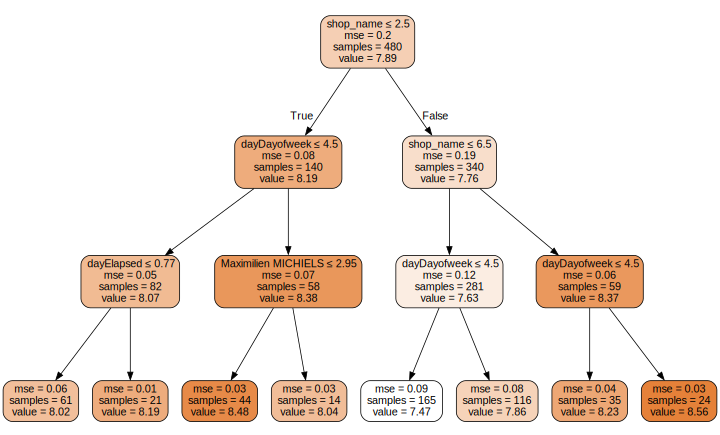

In [170]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [171]:

def rf(xs, y, n_estimators=40, max_samples=200,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [172]:
m = rf(xs, y);


In [173]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [174]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.212125, 0.231593)

In [175]:
r_mse(m.oob_prediction_, y)

0.242413

In [176]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [177]:
fi = rf_feat_importance(m, xs)
print(fi[:10])

                      cols       imp
0                shop_name  0.413651
8             dayDayofweek  0.230015
1              warehouseId  0.075169
67          Nadine DEBROUX  0.032762
85            dayDayofyear  0.022988
86              dayElapsed  0.020891
36   Diana ARBELAEZ CORREA  0.020645
22  Armando APARICIO PEREZ  0.016432
84                  dayDay  0.015929
60         Marine JANSSENS  0.013443


In [178]:
print(fi[10:20])

                           cols       imp
64          Maximilien MICHIELS  0.012733
7                       dayWeek  0.012162
52                  Kevin BETTE  0.010867
40  Fernando HERNANDEZ GUARDADO  0.009706
69                 Olivier HEES  0.008153
61                Massimo OLIVO  0.007788
24                Aubin KANDJEU  0.006343
6                      dayMonth  0.005674
83            Vincenzo LO GATTO  0.005564
33            Charlotte SNEYERS  0.005515


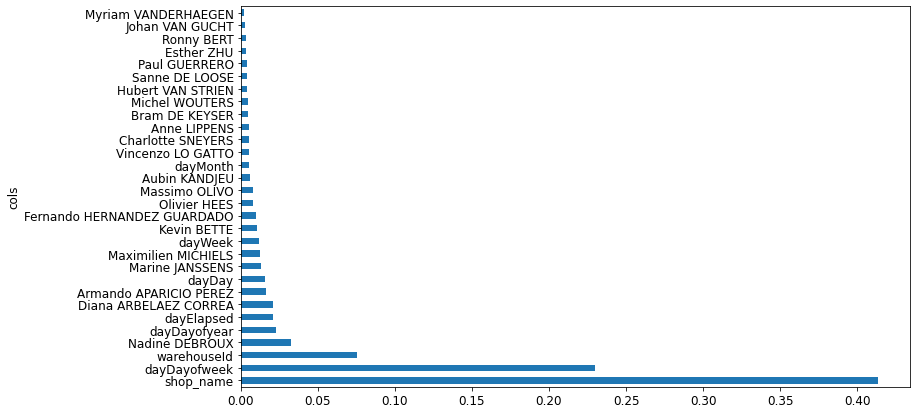

In [179]:

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);